In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 757s 2s/step - loss: 1.6134 - accuracy: 0.4122 - val_loss: 1.2542 - val_accuracy: 0.5720
Epoch 2/10
352/352 [==============================] - 732s 2s/step - loss: 1.2066 - accuracy: 0.5698 - val_loss: 0.9763 - val_accuracy: 0.6536
Epoch 3/10
352/352 [==============================] - 727s 2s/step - loss: 1.0203 - accuracy: 0.6391 - val_loss: 0.8957 - val_accuracy: 0.6848
Epoch 4/10
352/352 [==============================] - 728s 2s/step - loss: 0.9049 - accuracy: 0.6820 - val_loss: 0.8268 - val_accuracy: 0.7100
Epoch 5/10
352/352 [==============================] - 731s 2s/step - loss: 0.8047 - accuracy: 0.7167 - val_loss: 0.8354 - val_accuracy: 0.7110
Epoch 6/10
352/352 [==============================] - 737s 2s/step - loss: 0.7203 - accuracy: 0.7435 - val_loss: 0.8057 - val_accuracy: 0.7232
Epoch 7/10
352/352 [==============================] - 745s 2s/step - loss: 0.6512 - accuracy: 0.7690 - val_loss: 0.7915 - val_accuracy: 0.7350

In [13]:
score = model.evaluate(x_test, y_test, batch_size=128)
print("Test accuracy:", score[1])

79/79 [==============================] - 41s 514ms/step - loss: 0.8832 - accuracy: 0.7221
Test accuracy: 0.722100019454956


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 41s 131ms/step - loss: 0.8832 - accuracy: 0.7221


[0.8831713795661926, 0.722100019454956]

In [18]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 41s 131ms/step


array([[4.68347098e-05, 2.30962783e-07, 6.96045230e-04, 9.43019986e-01,
        1.09332514e-05, 5.25905192e-02, 3.60313011e-03, 9.17690704e-06,
        2.01549428e-05, 2.86846466e-06],
       [1.00402922e-05, 1.16052050e-02, 1.09979820e-12, 6.49319010e-12,
        2.90803140e-15, 2.37736250e-15, 1.87768803e-15, 5.19952446e-19,
        9.88381803e-01, 2.89177797e-06],
       [1.39522254e-01, 4.43981960e-02, 3.26634152e-04, 1.81271683e-03,
        1.26029435e-03, 1.11476065e-05, 1.09555585e-05, 2.19429967e-05,
        8.00670624e-01, 1.19651472e-02],
       [9.84529674e-01, 1.11811212e-03, 2.18902685e-04, 1.35752396e-06,
        1.59567426e-05, 2.26213714e-08, 1.10776469e-07, 3.84595609e-08,
        1.40169282e-02, 9.89024120e-05],
       [1.53741499e-11, 1.07309728e-09, 1.85625616e-03, 1.57189414e-01,
        9.69373658e-02, 5.95424608e-05, 7.43957281e-01, 7.62318542e-10,
        1.78472639e-10, 4.22184815e-10]], dtype=float32)

In [20]:
import numpy as np
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [36]:

y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

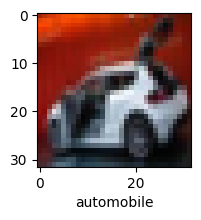

In [38]:
plot_sample(x_test, y_test,6)

In [40]:
classes[y_class[6]]

'automobile'

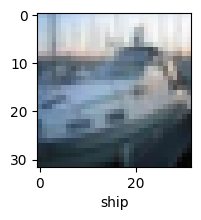

In [41]:
plot_sample(x_test, y_test,2)

In [42]:
classes[y_class[2]]

'ship'

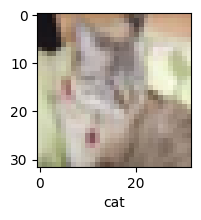

In [43]:
plot_sample(x_test, y_test,8)

In [44]:
classes[y_class[8]]

'cat'

In [46]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test,y_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.87      0.82      0.84      1000
           2       0.61      0.53      0.57      1000
           3       0.51      0.58      0.54      1000
           4       0.66      0.69      0.68      1000
           5       0.58      0.68      0.63      1000
           6       0.79      0.77      0.78      1000
           7       0.81      0.73      0.77      1000
           8       0.83      0.85      0.84      1000
           9       0.83      0.82      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

